In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("fashion-mnist_test.csv")

In [4]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = data.iloc[:,1:]

In [6]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y = data.iloc[:,0:1]

In [8]:
Y.head()

,label
0,0
1,1
2,2
3,2
4,3


In [9]:
data_sample =np.array(X)

In [10]:
Sample1 = data_sample[2345].reshape(28,28)
Sample2 = data_sample[999].reshape(28,28)
Sample3 = data_sample[43].reshape(28,28)

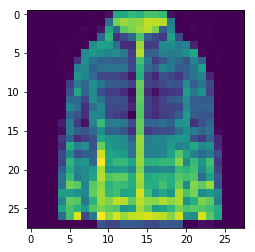

In [11]:
plt.imshow(Sample1)

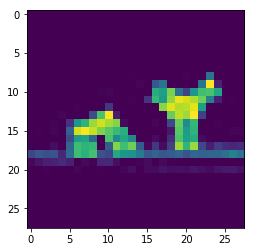

In [12]:
plt.imshow(Sample2)

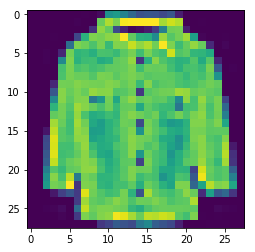

In [13]:
plt.imshow(Sample3)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.3)

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [16]:
gass = GaussianNB()
gass.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [33]:
V1 = gass.score(X_test,Y_test)
V1 = round(V1,3)
a=V1*100
a

59.5

In [17]:
gass_pred = gass.predict(X_test)
print (classification_report(Y_test,gass_pred))

             precision    recall  f1-score   support

          0       0.84      0.51      0.64       305
          1       0.82      0.93      0.87       289
          2       0.55      0.33      0.42       289
          3       0.42      0.81      0.56       265
          4       0.36      0.73      0.48       295
          5       0.93      0.31      0.47       315
          6       0.38      0.03      0.05       312
          7       0.52      0.96      0.67       318
          8       0.82      0.70      0.76       307
          9       0.88      0.68      0.77       305

avg / total       0.66      0.59      0.57      3000



In [18]:
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
V2 = MNB.score(X_test,Y_test)
V2 = round(V2,3)
b=V2*100
b

66.10000000000001

In [22]:
MNB_pred = MNB.predict(X_test)
print (classification_report(Y_test,MNB_pred))

             precision    recall  f1-score   support

          0       0.75      0.77      0.76       305
          1       0.98      0.91      0.94       289
          2       0.60      0.65      0.62       289
          3       0.66      0.88      0.75       265
          4       0.44      0.59      0.50       295
          5       0.78      0.18      0.30       315
          6       0.32      0.13      0.19       312
          7       0.59      0.87      0.70       318
          8       0.88      0.84      0.86       307
          9       0.66      0.84      0.74       305

avg / total       0.67      0.66      0.63      3000



In [23]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
V3 = Tree.score(X_test,Y_test)
V3 = round(V3,3)
c=V3*100
c

75.4

In [25]:
Tree_pred = Tree.predict(X_test)
print (classification_report(Y_test,Tree_pred))

             precision    recall  f1-score   support

          0       0.74      0.68      0.70       305
          1       0.94      0.92      0.93       289
          2       0.64      0.67      0.65       289
          3       0.73      0.79      0.76       265
          4       0.64      0.64      0.64       295
          5       0.86      0.82      0.84       315
          6       0.50      0.48      0.49       312
          7       0.80      0.80      0.80       318
          8       0.87      0.89      0.88       307
          9       0.82      0.86      0.84       305

avg / total       0.75      0.75      0.75      3000



In [26]:
RFC = RandomForestClassifier()
RFC.fit(X_test,Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
V4 = RFC.score(X_test,Y_test)
V4 = round(V4,3)
d=V4*100
d

99.5

In [28]:
RFC_pred = RFC.predict(X_test)
print (classification_report(Y_test,RFC_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       305
          1       1.00      1.00      1.00       289
          2       0.99      1.00      1.00       289
          3       0.99      1.00      0.99       265
          4       0.99      1.00      1.00       295
          5       0.99      1.00      1.00       315
          6       1.00      0.98      0.99       312
          7       0.99      0.99      0.99       318
          8       1.00      1.00      1.00       307
          9       0.99      0.99      0.99       305

avg / total       1.00      0.99      0.99      3000



In [29]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
V5 = KNN.score(X_test,Y_test)
V5 = round(V5,3)
e=V5*100
e

81.89999999999999

In [31]:
KNN_pred = KNN.predict(X_test)
print (classification_report(Y_test,KNN_pred))

             precision    recall  f1-score   support

          0       0.76      0.83      0.79       305
          1       0.98      0.96      0.97       289
          2       0.68      0.77      0.72       289
          3       0.88      0.84      0.86       265
          4       0.72      0.76      0.74       295
          5       0.99      0.74      0.85       315
          6       0.63      0.50      0.56       312
          7       0.82      0.91      0.86       318
          8       0.95      0.96      0.95       307
          9       0.82      0.95      0.88       305

avg / total       0.82      0.82      0.82      3000



In [34]:
Classifiers_Name = ['Gaussian Naive Bayes','Multinomial Naive Bayes','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier']
Classifiers_Score =[a,b,c,d,e]

In [36]:
df = pd.DataFrame({'Classifiers' : Classifiers_Name , 'Accuracy Score' : Classifiers_Score},index=[1,2,3,4,5])
df

,Classifiers,Accuracy Score
1,Gaussian Naive Bayes,59.5
2,Multinomial Naive Bayes,66.1
3,DecisionTreeClassifier,75.4
4,RandomForestClassifier,99.5
5,KNeighborsClassifier,81.9
